In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as scpi
import seaborn as sns
import time
from tqdm.notebook import tqdm

from task_a import walk
from task_a import functions

np.random.seed(42)

# Project 3
## Task a

In [2]:
N_p = 100    # Number of probabilities p
p_min = 0.0
p_max = 1.0

Lx = 200  # Size of system
Ly = Lx

N = 1000

p = np.linspace(p_min, p_max, N_p)

P = functions.dens_span_cluster(p, Lx, Ly, N)

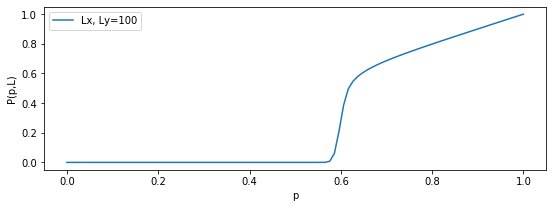

In [3]:
plt.figure(figsize=(9,3))
plt.plot(p, P, label='Lx, Ly=100')
plt.xlabel(f'p')
plt.ylabel(f'P(p,L)')
plt.legend()
plt.show()

From the above figure we see that the probability of a site to be a part of a spanning cluster increases with the probability for a site to be set (occupied). The probability behaves as one would expect; for $p < p_c$, where $p_c \approx 0.5927$ is the percolation threshhold, we have little or no percolation, while for $p > p_c$ we observe a rapid increase in percolation before it shows an almost linear increase. Below we show the percolation probability for $L_x >> L_y$.

In [6]:
Lx = 4000
Ly = 100
P2 = functions.dens_span_cluster(p, Lx, Ly, N_p)

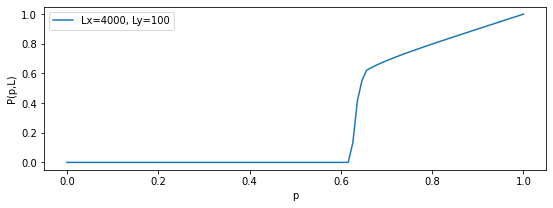

In [5]:
plt.figure(figsize=(9,3))
plt.plot(p, P2, label=f'Lx={Lx}, Ly={Ly}')
plt.xlabel(f'p')
plt.ylabel(f'P(p,L)')
plt.legend()
plt.show()

We expect a sharper curve as $L \rightarrow \infty$. Below $L_x$ is increased as $10^i, \quad i = 1, 2, ..., 6$ while $L_y=100$ is kept constant to save computational time.

Time elapsed: 475.9785900115967, for i=12
Time elapsed: 28.79720401763916, for i=10
Time elapsed: 1.7857465744018555, for i=8
Time elapsed: 0.3352322578430176, for i=6
Time elapsed: 0.20988845825195312, for i=4



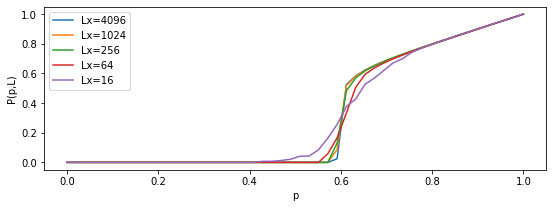

In [10]:
# Reducing computational time
N = 20
N_p = 50
p = np.linspace(p_min, p_max, N_p)

plt.figure(figsize=(9,3))

for i in tqdm(range(12, 3, -2)):
    start = time.time()
    Lx = 2**i
    Ly = Lx
    P = functions.dens_span_cluster(p, Lx, Ly, N_p)
    plt.plot(p, P, label=f'Lx={Lx}')
plt.xlabel(f'p')
plt.ylabel(f'P(p,L)')
plt.legend()
plt.show()

C:\Users\chris\Documents\GitHub\FYS4460\Project3\task_a\functions.py:76: RuntimeWarning: invalid value encountered in less
  binary_domain = domain < pi


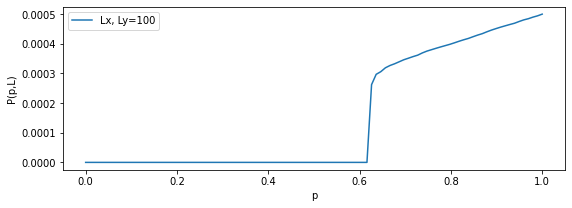

In [6]:
Lx = 100
Ly = 100

N_p = 100    # Number of probabilities p
p_min = 0.0
p_max = 1.0
p = np.linspace(p_min, p_max, N_p)

Lx = 200  # Size of system
Ly = Lx

N = 1000

P = functions.DensSpanClusterAltGeo(p, Lx, Ly, N)
plt.figure(figsize=(9,3))
plt.plot(p, P, label='Lx, Ly=100')
plt.xlabel(f'p')
plt.ylabel(f'P(p,L)')
plt.legend()
plt.show()

Tried making a boundary such that the upper left quadrant of the matrix is 1 or None, to simulate it not being a part of domain, i.e. there is no possibility for there to be unoccupied space. When labeling the data it counts the quadrant that is set to 1 as a label, so even setting half the domain to 1 we get a spanning cluster. Setting it to None might work, but I have not been able to surpass the issues calculating with None.

# Task d

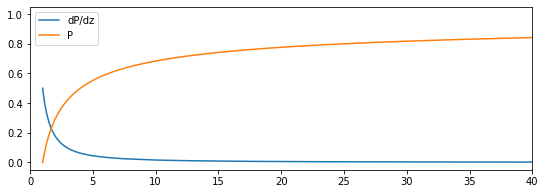

In [27]:
np.random.seed(42)
N = int(1e6)
z = np.random.uniform(size=N)**(-3+1)
z = np.sort(z)

cdf = z**(-0.5) # -0.5 = 1/alpha = 1/(-3+1) = -1/2
ccdf = 1 - cdf # = 1 - P(Z <= z) = P(Z > z)

der = (ccdf[1:] - ccdf[:-1]) / (z[1:] - z[:-1])

f = np.zeros(len(z))
f[1:-1] = 0.5 * (der[1:] + der[:-1])
f[0] = der[0]
f[-1] = der[-1]

plt.figure(figsize=(9,3))
plt.plot(z, f, label='dP/dz')
plt.plot(z, ccdf, label='P')
plt.xlim(0,40)
plt.legend()
plt.show()

The figure above shows the complementary cumulative distribution (cCDF) of z $P(Z > z)$, which corresponds to $1 - P(Z \leq z)$. We observe that $P \rightarrow 1$ and $dP/dz \rightarrow 0$. The cumulative distribution is given as $1$ if$ Z \geq z$, $0$ if $Z < z$ and $z^{-1/\alpha} else$, where $\alpha = (-3+1) = -2$. The deriviate of the the cCDF is found by numerical derivation. 

# Task e

In [2]:
def log_binning(data, a, L, N):
    """
    Arguments:
        Data:
        a: log base
        L: length of system in x and y
        N: number of cycles
    Returns:
        sl: 
        nsl: 
    """
    logamax = np.ceil(np.log(np.max(data))) / np.log(a)
    logbins = a**np.arange(0, logamax)

    nl, nlbins = np.histogram(data, bins=logbins)
    
    ds = np.diff(logbins)
    sl = 0.5 * (logbins[1:] + logbins[:-1])
    nsl = nl / (N * L**2 * ds)
    
    return sl, nsl


# Task f

In [15]:
np.random.seed(42)
N_p = 5    # Number of probabilities p
p_min = 0.4
pc = 0.59275
p_max = 0.8
pless = np.linspace(p_min, pc, N_p)
pover = np.linspace(pc, p_max, N_p)

Lx = 200  # Size of system
Ly = Lx
N = 1000
base_log = 1.2

sl_list_p1 = []
nsl_list_p1 = []
legends_p1 = []

for prob in tqdm(pless):
    area = functions.mass_cluster(prob, Lx, Ly, N)
    sl, nsl = log_binning(area, base_log, Lx, N)
    i = np.nonzero(nsl)
    sl_list_p1.append(sl[i])
    nsl_list_p1.append(nsl[i])
    legends_p1.append(f'p={prob:.2f}')

sl_list_p2 = []
nsl_list_p2 = []
legends_p2 = []

for prob in tqdm(pover):
    area = functions.mass_cluster(prob, Lx, Ly, N)
    sl, nsl = log_binning(area, base_log, Lx, N)
    i = np.nonzero(nsl)
    sl_list_p2.append(sl[i])
    nsl_list_p2.append(nsl[i])
    legends_p2.append(f'p={prob:.2f}')

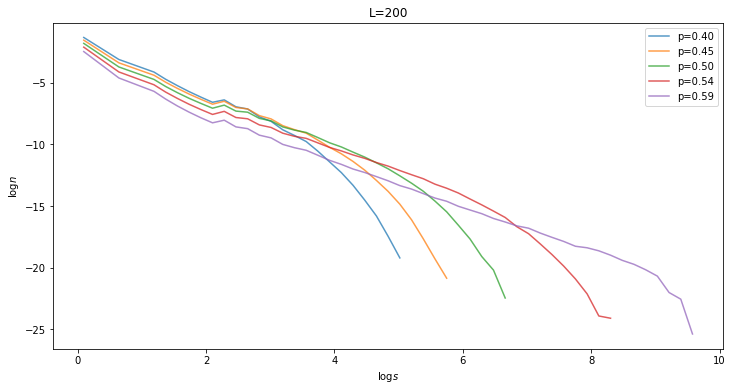

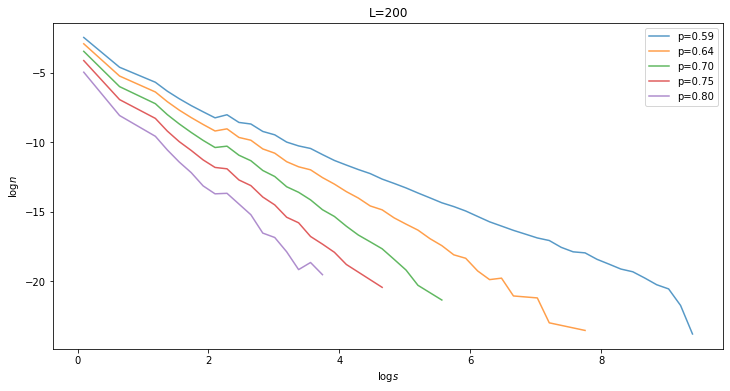

In [26]:
plt.figure(figsize=(12,6))
for sl, nsl in zip(sl_list_p1, nsl_list_p1):
    plt.plot(np.log(sl), np.log(nsl), alpha=0.75)
plt.legend(legends_p1)
plt.title(f'L=200')
plt.xlabel('$\\log s$')
plt.ylabel('$\\log n$')
plt.show()

plt.figure(figsize=(12,6))
for sl, nsl in zip(sl_list_p2, nsl_list_p2):
    plt.plot(np.log(sl), np.log(nsl), alpha=0.75)
plt.title(f'L=200')
plt.legend(legends_p2)
plt.xlabel('$\\log s$')
plt.ylabel('$\\log n$')
plt.show()

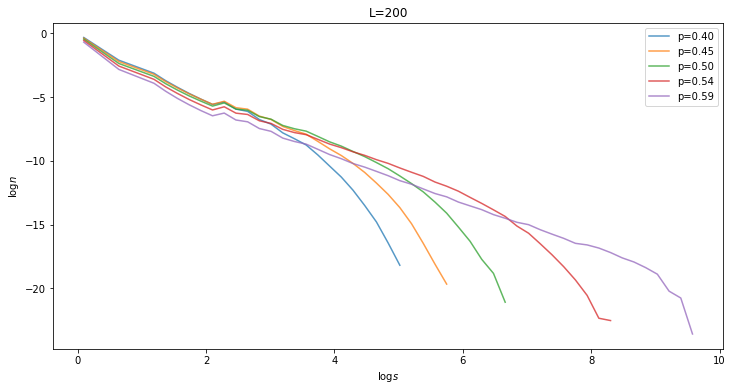

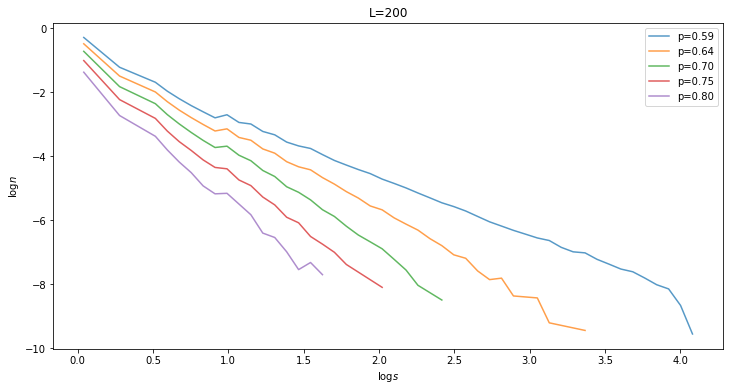

In [25]:
plt.figure(figsize=(12,6))
for sl, nsl, pi in zip(sl_list_p1, nsl_list_p1, pless):
    plt.plot(np.log(sl), np.log(nsl * (1 - pi)**(-2)), alpha=0.75)
plt.legend(legends_p1)
plt.title(f'L=200')
plt.xlabel('$\\log s$')
plt.ylabel('$\\log n$')
plt.show()

plt.figure(figsize=(12,6))
for sl, nsl in zip(sl_list_p2, nsl_list_p2):
    plt.plot(np.log10(sl), np.log10(nsl*(1 - pi)**(-2)), alpha=0.75)
plt.title(f'L=200')
plt.legend(legends_p2)
plt.xlabel('$\\log s$')
plt.ylabel('$\\log n$')
plt.show()

We see that the cluster number density shows an linear behavior in a logarithmic plot, this tells us that it follows a power law.

# Task g

Since the cluster number density follows a power law we apply the scaling ansatz

\begin{equation}
n(s,p) = s^{-\tau}F\left(\frac{s}{s_{\xi}}\right),
\end{equation}

where F is some scaling function. We can rewrite the scaling form of $n(s,p)$ as

\begin{equation}
n(s,p) = s^{-\tau}F\left(\frac{s}{s_{\xi}}\right) = s^{-\tau}\left(\left(p - p_c\right)^{1/\sigma}s\right),
\end{equation}

where we have used that $s_{\xi} \approx |p-p_c|^{-1/\sigma}$. 

Below we approximate $\tau$ by looking at $n(s,p;L)$, i.e. the cluster number density as a function of the spanning cluster size s, and probability of a site to be set p, given a system size L.

In [4]:
N = 1000
pc = 0.59275

L = 2**(np.arange(9,3,-1)) # To ensure decreasing s/it in loop below

sl_list_L = []
nsl_list_L = []

for l in tqdm(L):
    area = functions.mass_cluster(pc, l, l, N)
    sl, nsl = log_binning(area, 1.2, l, N)
    i = np.nonzero(nsl)
    sl_list_L.append(sl[i])
    nsl_list_L.append(nsl[i])

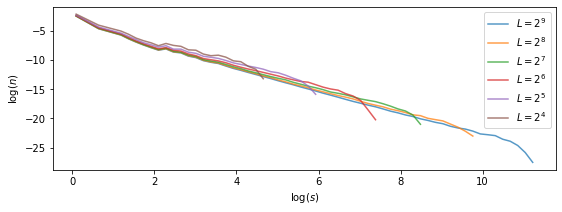

In [11]:
plt.figure(figsize=(9,3))
for i in range(len(sl_list_L)):
    plt.plot(np.log(sl_list_L[i]), np.log(nsl_list_L[i]), markersize=2, alpha=0.75)
plt.legend(['$L=2^9$', '$L=2^8$', '$L=2^7$', '$L=2^6$', '$L=2^5$', '$L=2^4$'])
plt.xlabel(f'$\log(s)$')
plt.ylabel(f'$\log(n)$')
plt.show()

From the figure above we see that the curves are approximately linear for the a large portion of the graphs. We choose a set of datapoints for each L for which we calculate the slope.

In [9]:
slopes = []
# icepts = []
for sl, nsl in zip(sl_list_L, nsl_list_L):
    sl = np.log10(sl[:20])
    nsl = np.log10(nsl[:20])
    slope, _ = np.polyfit(sl, nsl, 1)
    slopes.append(slope)
#     icepts.append(icept)
slopes.append(slope)

tau = np.sum(slopes)/len(slopes)
print(f'tau: {-tau}')

tau: 1.9680432519633295


From the scaling ansatz we we know that $\tau \in [2, 3)$, and for two dimensions $\tau \approx 2.09$. From above we found $\\tau \approx 1.96$, which is smaller than expected. From the figure above we see that the graphs does not follow a power law perfectly, but it shows a clear trend of being linear in the logarithmic plot. Increasing the iterations in the Monte Carlo simulation does not improve the graph, it follows that the measured $\\tau$ should be approximately the same.

# Task h



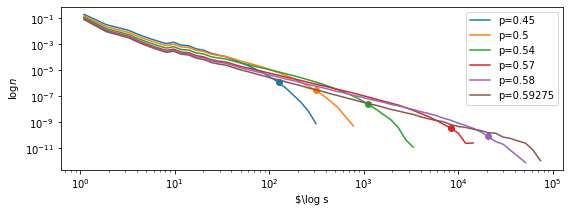

In [12]:
p = [0.45, 0.50, 0.54, 0.57, 0.58]

N = 500
L = 512
base_log = 1.2

area_pc = functions.mass_cluster(pc, L, L, N)
sl_pc, nsl_pc = log_binning(area_pc, base_log, L, N)
i = np.nonzero(nsl_pc)
nsl_pc = nsl_pc[i]
sl_pc = sl_pc[i]

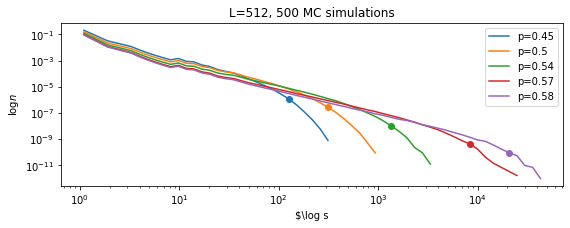

In [16]:
s_ksi_list = []
sl_list = []
nsl_list = []

plt.figure(figsize=(9,3))
for prob in tqdm(p):
    area = functions.mass_cluster(prob, L, L, N)
    sl, nsl = log_binning(area, base_log, L, N)
    i = np.nonzero(nsl)
    sl = sl[i]
    nsl = nsl[i]
    
    sl_list.append(sl)
    nsl_list.append(nsl)
    
    Fn_pc = 0.5 * nsl_pc[:len(nsl)]
    plt.loglog(sl, nsl, label=f'p={prob}')
    
    idx = np.argwhere(np.diff(np.sign(Fn_pc - nsl))).flatten()[-1]
    s_ksi = sl[idx]
    s_ksi_list.append(s_ksi)
    plt.scatter(s_ksi, nsl[idx])

# plt.loglog(sl_pc, nsl_pc, label=f'p={pc}')
plt.title('L=512, 500 MC simulations')
plt.legend()
plt.xlabel(f'$\\log s')
plt.ylabel(f'$\\log n$')
plt.show()

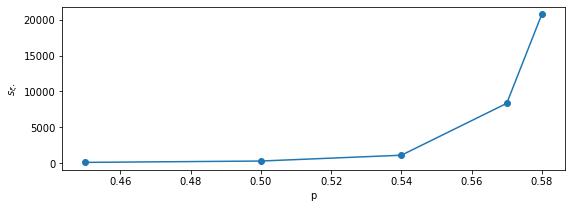

In [13]:
plt.figure(figsize=(9,3))
plt.plot(p, s_ksi_list, '-o')
plt.xlabel(f'p')
plt.ylabel(f'$s_{{\\xi}}$.')
plt.show()
plt.show()

We observe that the values above are off compared to the lecture notes. We would expect the values of $s_{\xi}$ to be larger than what is found here.

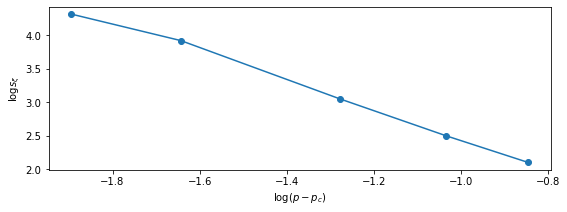

sigma=0.4616997853951107


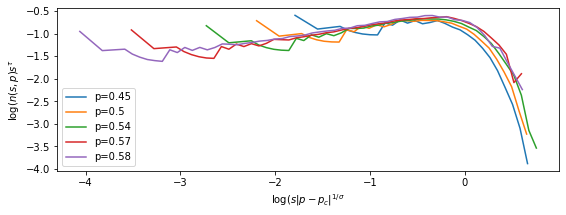

In [15]:
s_ksi_arr = np.array(s_ksi_list)
p_arr = np.array(p)

plt.figure(figsize=(9,3))
plt.plot(np.log10(np.abs(p_arr - pc)), np.log10(s_ksi_arr), '-o')
plt.xlabel(f'$\\log(p - p_c)$')
plt.ylabel(f'$\\log s_{{\\xi}}$')
plt.show()

slope, _ = np.polyfit(np.log10(np.abs(p_arr - pc)), np.log10(s_ksi_arr), 1)
sig = -1 / slope

print(f'sigma={sig}')

plt.figure(figsize=(9,3))
for sl, nsl, prob in zip(sl_list, nsl_list, p):
    plt.plot(np.log10(sl * np.abs(prob - pc)**(1 / sig)), np.log10(nsl * sl**2.09), label=f'p={prob}')
plt.xlabel(f'$\\log(s|p-p_c|^{{1/\\sigma}}$')
plt.ylabel(f'$\\log(n(s,p)s^{{\\tau}}$')
plt.legend()
plt.show()

From the above we found $\sigma \approx 0.47$. In the last figure we have used $\tau = 2.09$, as this shows the expected behavior. The last plot above is a representation of the scaling function $F(x)$, which proves that the cluster number density follows a power law, as the curves for different values of $p$ approximately follows a curve. We observe a collapse of data as $p$ approaches the percolation threshold $p_c$.

# Task i

The mass of the percolating cluster $M(L)$ is found by the area of the percolating cluster. We know that the mass follows $M(L)\propto L^D$ for some constant $D$ that is specific to the dimensionality of the system. For the two dimensional system we know that $D=1.89$. By the proportionality above we see that $M(L)$ should follow a power-law, and we can find the power $D$ as the slope in logarithmic scale. 

In [54]:
np.random.seed(42)
pc = 0.59275
L = 2**np.arange(11,3,-1)
N = 1000
N_L = len(L)

area = functions.mass_spanning_cluster(pc, L, N)
M = np.array(area)

In [374]:
slope, icept = np.polyfit(np.log(L), np.log(M), 1)
print(f'D = {slope}')

plt.figure(figsize=(9,3))
plt.loglog(L, M, '-o')
plt.title(f'Mass as function of system size for percolating cluster')
plt.xlabel(f'$\\log L$')
plt.ylabel(f'$\\log M$')
plt.show()

NameError: name 'M' is not defined

From the figure above we see that we have a linear dependence of $M$ on $L$ in a logarithmic plot, which confirms the power-law depence of $M$ on $L$. We found $D\approx 1.87$, which is smaller than the known value.

# Task l

The percolation probability $\Pi(p_{\Pi=x}) = x$ is set to 0.8 or 0.3, the percolation probability is also dependent upon the system size $L$. To find the values $p_{\Pi=x_1}$ and $p_{\Pi=x_2}$ we find the points where $y_1 = x_1 = 0.8$ and $y_2 = x_2 = 0.3$ intersects the line $\Pi(p_{\Pi=x_1}) = N_i/N$ and $\Pi(p_{\Pi=x_2}) = N_i/N$. We run a Monte-Carlo simulation with $N$ simulations, where $N_i$ corresponds to the amount of percolating systems for a given p, corresponding to the probability for a site to be set. To find the point of intersection we perform an interpolation. 

In [303]:
x1 = 0.8
x2 = 0.3

L = np.array([25, 50, 100, 200, 400, 800])
N = np.array([3000, 2500, 2000, 1500, 1000, 500])
p = np.linspace(0.5, 0.65, 51)
nL = len(L)
nx = len(p)

Ni = np.zeros((nx, nL))
Pi = np.zeros((nx, nL))

for k, l in tqdm(enumerate(L)):
    n = N[k]#int(4000 * 25 / l) # Total number of systems, also No. MC sims
    for i in range(n):
        domain = np.random.rand(l, l)
        for j, pi in enumerate(p):
            binary_domain = domain < pi
            label, num = scpi.measurements.label(binary_domain)
            perc_x = np.intersect1d(label[0, :], label[-1, :])
            perc_y = np.intersect1d(label[:, 0], label[:, -1])
            percx = perc_x[np.where(perc_x > 0)]
            percy = perc_y[perc_y > 0]
            if len(percx) > 0:# or len(percy) > 0:
                Ni[j, k] += 1
    Pi[:, k] = Ni[:, k] / n # For all p we store values for each

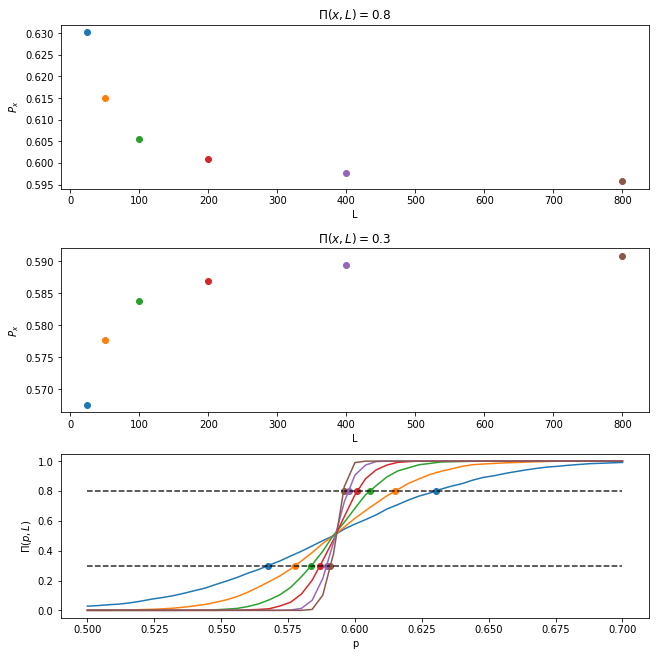

In [300]:
fig, axes = plt.subplots(3, figsize=((9,9)), constrained_layout=True)
# id1 = np.min(np.argwhere(p >= 0.53))
# id2 = np.max(np.argwhere(p <= 0.65))

px1_vals = np.zeros(nL)
px2_vals = np.zeros(nL)

for i in range(nL):
    ipx1 = np.argmax(Pi[:, i] > x1)
    ipx2 = np.argmax(Pi[:, i] > x2)
    px1_vals[i] = p[ipx1-1] + (x1 - Pi[ipx1-1, i]) * (p[ipx1] - p[ipx1-1]) / (Pi[ipx1, i] - Pi[ipx1-1, i])
    px2_vals[i] = p[ipx2-1] + (x2 - Pi[ipx2-1, i]) * (p[ipx2] - p[ipx2-1]) / (Pi[ipx2, i] - Pi[ipx2-1, i])  
    
    axes[0].plot(L[i], px1_vals[i], 'o', color=f'C{i}')
    axes[1].plot(L[i], px2_vals[i], 'o', color=f'C{i}')
    
    axes[2].plot(p, Pi[:, i], color=f'C{i}')
    axes[2].scatter(px1_vals[i], x1, color=f'C{i}')
    axes[2].scatter(px2_vals[i], x2, color=f'C{i}')
    axes[2].plot(p, np.ones(len(p)) * x1, 'k--', alpha=0.2)
    axes[2].plot(p, np.ones(len(p)) * x2, 'k--', alpha=0.2)
axes[0].set(xlabel=f'L', ylabel=f'$P_x$')
axes[0].set_title(f'$\\Pi(x,L)=0.8$')
axes[1].set(xlabel=f'L', ylabel=f'$P_x$')
axes[1].set_title(f'$\\Pi(x,L)=0.3$')
axes[2].set(xlabel=f'p', ylabel=f'$\\Pi(p,L)$')
plt.show()

From the first two figures above we see $p_x$ as a function of system size $L$. For both $\Pi(p,L) = 0.8$ and $\Pi(p,L) = 0.3$ $p_x \rightarrow p_c$ as $L\rightarrow\infty$, which is exactly as we would expect.

# Task m

From the scaling theory we have 

\begin{equation}
dp = p_{x_1} - p_{x_2} = \left(C_{x_1} - C_{x_2}\right) L^{-1/\nu},
\end{equation}

where $C_x$ represents a number, which only serves as a scaling to the function. To find $\nu$ we write the equation as $p_{x_1} - p_{x_2} = L^{-1/\nu}$, we observe that we can find the exponent of L by finding the slope of a logarithmic plot.

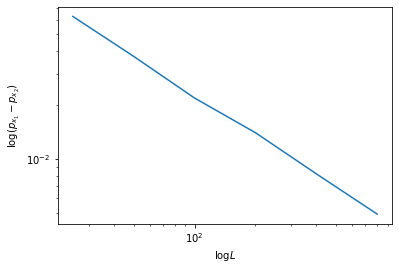

In [301]:
plt.loglog(L, px1_vals - px2_vals)
plt.xlabel('$\\log L$')
plt.ylabel('$\\log(p_{x_1} - p_{x_2})$')
plt.show()


The above figure confirms a power-law depence of $\\log(p_{x_1} - p_{x_2})$ on $\\log L$. We continue by finding the slope.

In [365]:
slope, icept = np.polyfit(np.log10(L), np.log10(px1_vals - px2_vals), 1)
print(f'Found nu:   {-1 / slope:.3f} \nActual nu:  {4/3:.3f}')
print(f'Abs. error: {np.abs(-1 / slope - 4/3):.4f}')

Found nu:   1.368 
Actual nu:  1.333
Abs. error: 0.0349


# Task n

We can write the percolation probability as 

\begin{equation}
\Pi (p, L) = \xi ^0 f\left(\frac{L}{\xi}\right),
\end{equation}

where f(u) is some scaling function. By inserting $\xi = \xi_0|p - p_c|^{-\nu}$ we can transform the argument of f, further we introduce $\Phi(u) = f(\xi_0 u^(1/\nu)$:

\begin{equation}
\Pi(p,L) = f\left(\xi_0 \left(L^{1/\nu}\left(p - p_c\right)\right)^{\nu}\right) = \Phi\left(L^{1/\nu}\left(p - p_c\right)\right).
\end{equation}

If we insert $\Pi(p_{\Pi = x}, L) = x$ and take the inverse of $\Phi$ s.t. $\phi(u) = x \Rightarrow u = \Phi^{-1}(x)$ we get:

\begin{equation}
(p_x - p_c)L^{1/\nu} = \Phi^{-1}(x) = C_x \Rightarrow p_x = p_c + C_x L^{-1/\nu},
\end{equation}

where $C_x$ is some number. 

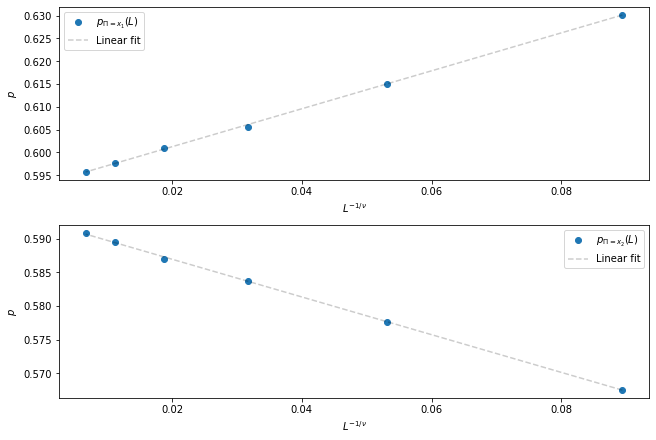

In [337]:
nu = 4 / 3

L_nu = L**(-1 / nu)

slope_x1, icept_x1 = np.polyfit(L_nu, px1_vals, 1)
slope_x2, icept_x2 = np.polyfit(L_nu, px2_vals, 1)

fig, axes = plt.subplots(2, figsize=((9,6)), constrained_layout=True)
axes[0].plot(L_nu, px1_vals, 'o', label='$p_{\\Pi=x_1}(L)$')
axes[0].plot(L_nu, slope_x1 * L_nu + icept_x1, '--', color='k', alpha=0.2, label='Linear fit')
axes[1].plot(L_nu, px2_vals, 'o', label='$p_{\\Pi=x_2}(L)$')
axes[1].plot(L_nu, slope_x2 * L_nu + icept_x2, '--', color='k', alpha=0.2, label='Linear fit')
axes[0].set(xlabel='$L^{-1/\\nu}$', ylabel='$p$')
axes[1].set(xlabel='$L^{-1/\\nu}$', ylabel='$p$')
axes[0].legend()
axes[1].legend()
plt.show()

In [357]:
pc_x1 = icept_x1
pc_x2 = icept_x2

print(f'p_c for x_1: {pc_x1:.5f} \np_c for x_2: {pc_x2:.5f} \nActual p_c:  {pc}')
print(f'Abs. error for x_1: {np.abs(pc_x1 - pc):.6f} \nAbs. error for x_2: {np.abs(pc_x2 - pc):.6f}')

p_c for x_1: 0.59293 
p_c for x_2: 0.59251 
Actual p_c:  0.59275
Abs. error for x_1: 0.000178 
Abs. error for x_2: 0.000236


We observe that the value found by the intercept of a linear regression on the data is quite close to the analytical value of $p_c$.

We can now plot $\Pi(p,L) = L^{1/\nu}\left(p - p_c\right)$ to find $\Phi$.

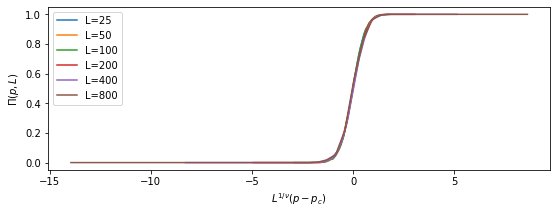

In [380]:
p_pc = p - pc

plt.figure(figsize=(9,3))
for l in range(nL):
    plt.plot(L[l]**(1 / nu) * p_pc, Pi[:, l], label=f'L={L[l]}')
plt.xlabel('$L^{1/\\nu}(p - p_c)$')
plt.ylabel('$\\Pi(p,L)$')
plt.legend()
plt.show()


The previous figure shows a data collapse plot. All the lines fall unto a common curve which is $\Phi(u)$.

# Task p

By moving a random walker through the spanning cluster (zz) we find a self avoiding path (SAP). We start by sending a random walker who is biased to moving left, then we send one that is biased to moving right. The random walkers find the same, or different, or no, SAP through the spanning cluster. We create a new domain showing the SAP that the respective walker found, all values of the domain are $> 0$ if the walker passed through the site, else the value is 0. By multiplying the domains found by the left-biased walker and the right-biased walker we find the sites where both of the walker had to pass a long the SAP. The values of the domain that are $> 0$ correspond to the singly connected bond(s) (sites), and if we were to remove one of these sites, there would no longer be a spanning cluster. Each time a random walker passes through a site, the value on the domain corresponding to the site is increased as to show that there are multiple SAPs going through the same site(s). If there are x number of SAPs going through the cluster, there are x SAPs meeting at a singly connected bond. Considering a flow induced by a pressure running through a porous medium with a spanning cluster and multiple SAPs, we would see an increase of pressure at the singly connected sites, as the "flows" would meet; there would be fluid coming from x SAPs trying to go through the same space.

# Task q

To find the mass of the singly connected bonds we create a percolating cluster and send left-biased and right-biased walkers through the percolating cluster. We then find the singly connected bonds as we did in the previous excersize. By counting the singly connected bonds we have found $M_{SC}(L)$ for a given system size L.

The mass of the singly connected bonds $M_{SC} \propto L^{D_{SC}}$. To find the exponent of L $D_{SC}$ we find the slope of the logarithmic plot of $M_{SC}$ as a function of $L$.

In [2]:
from task_a import walk
pc = 0.59275
L = np.array([25, 50, 100, 200, 400, 800])
N = 2000
M_sc = functions.mass_singly_con(pc, L, N, walk)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:21<00:00, 24.46it/s]


Plotting $M_{SC}(L)$ we observe a linear depence in the logarithmic scale.

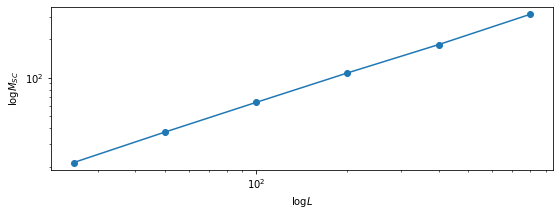

In [3]:
plt.figure(figsize=((9,3)))
plt.loglog(L, M_sc, '-o')
plt.xlabel(f'$\log L$')
plt.ylabel('$\log M_{SC}$')
plt.show()

In [4]:
slope, _ = np.polyfit(np.log10(L), np.log10(M_sc), 1)
print(f'Numerical D_sc:  {slope:.4f} \nAnalytical D_sc: {3 / 4:.4f} \nAbs. error:      {np.abs(slope - 3 / 4):.4f}')

Numerical D_sc:  0.7668 
Analytical D_sc: 0.7500 
Abs. error:      0.0168


Comparing the numercal solution of the exponent $D_{SC}$ we see that we have come fairly close with the finite system size. 

We know that
\begin{equation}
P_{SC} = M_{SC}/L^d \propto L^{D_{SC}}/L^d = L^{D_{SC} - d}.
\end{equation}

By the finite scaling ansatz we can write

\begin{equation}
P_{SC}(p, L) = L^{D_{SC} - d}f(L/\xi),
\end{equation}

where f(u) is some scaling function. To find the behaviour of $P_{SC}$ as a function of $p - p_c$ we want to find the equation f(u) by a data collapse plot. We now insert $\xi = \xi_0|p-p_c|^{-\nu}$

\begin{align}
P_{SC}(p,L) &= L^{D_{SC} - d}f(L\xi_0|p-p_c|^{\nu}) \\
&= L^{D_{SC} - d}\tilde f ((L^{1/\nu}(p - p_c)),
\end{align}

where we have transformed the scaling function by omitting the exponent $\nu$ of $p - p_c$ and the constant $\xi_0$ as they simply scale the function. We now plot

\begin{equation}
L^{-(D_{SC} - d)}P_{SC}(p,L) = \tilde f(L^{1/\nu}(p - p_c))
\end{equation}

for a given L, while varying p. We find $P_{SC} = M_{SC} / L^2$.

In [44]:
nu = 4 / 3
L = np.array([100, 200, 400, 800])
N = 500
p = np.linspace(pc, 0.7, 11)
P_sc = []

for i, l in tqdm(enumerate(L)):
    P_sc.append(functions.dens_singly_con(p, l, N, walk))

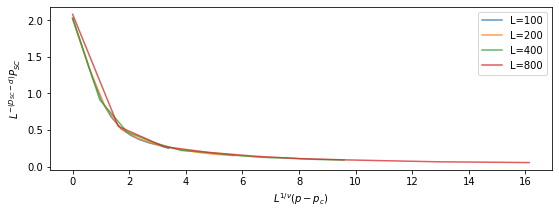

In [47]:
d = 2
D_sc = 3 / 4

plt.figure(figsize=((9,3)))
for i in range(len(L)):
    x = L[i]**(1 / nu)*(p - pc)
    y = L[i]**(-(D_sc - d)) * P_sc[i]
    plt.plot(x, y, label=f'L={L[i]}', alpha=0.75)
plt.xlabel('$L^{1/\\nu}(p - p_c)$')
plt.ylabel('$L^{-(D_{SC} - d)} P_{SC}$')
# plt.xlim(-0.1, 5)
plt.legend()
plt.show()

From the above figure we see that there is a data collapse and we have located the behaviour of $P_{SC}$ as a function of $(p - p_c)$. As we increase p, i.e. $(p-p_c)$ grows, the probability density of singly connected bonds goes to zero. Intuitively this is as expected; as the percolating cluster grows, there are more SAPs for a flow to make its way through the system.